W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
Użyj bazy danych znajdującej się tutaj. Przygotuj odpowiednie zestawienia i wizualizacje, a następnie sformułuj swoją opinię na temat wyżej wymienionych kwestii. Rozwiązanie prześlij Mentorowi do oceny.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

df = pd.read_csv('/Users/aga/Downloads/HRDataset.csv')
df.columns


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [2]:
df.drop(['HispanicLatino','EmpStatusID','DeptID','CitizenDesc','RaceDesc','State','Department','GenderID','FromDiversityJobFairID','PayRate','TermReason','PositionID','Zip'],axis=1,inplace=True)
#df.drop(~df.columns.str.endswith('ID'),axis=1,inplace=True)
df.sample(10)
#print(df.shape[0])
#40
#df.duplicated()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,PerfScoreID,Termd,Position,DOB,Sex,MaritalDesc,...,EmploymentStatus,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
107,"Fidelia, Libby",1.006020e+09,1.0,1.0,3.0,0.0,Production Technician I,03/16/81,F,Married,...,Active,Brannon Miller,12.0,Social Networks - Facebook Twitter etc,Fully Meets,5.00,5.0,0.0,1/29/2019,0.0
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,"Ozark, Travis",8.120118e+08,0.0,0.0,3.0,0.0,Area Sales Manager,05/19/82,M,Single,...,Active,John Smith,17.0,Website Banner Ads,Fully Meets,5.00,5.0,0.0,1/14/2019,0.0
134,"Beatrice, Courtney",1.403066e+09,0.0,0.0,3.0,0.0,Production Technician I,10/27/70,F,Single,...,Active,Elijiah Gray,16.0,Search Engine - Google Bing Yahoo,Fully Meets,5.00,5.0,0.0,1/14/2019,0.0
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,"Faller, Megan",1.108028e+09,1.0,1.0,3.0,0.0,Production Technician II,09/22/78,F,Married,...,Active,Elijiah Gray,16.0,Professional Society,Fully Meets,1.49,5.0,0.0,2/22/2019,0.0
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,"Mangal, Debbie",1.308061e+09,1.0,1.0,3.0,0.0,Production Technician I,11/07/74,F,Married,...,Active,Brannon Miller,12.0,On-campus Recruiting,Fully Meets,1.04,3.0,0.0,1/22/2019,0.0


<AxesSubplot:>

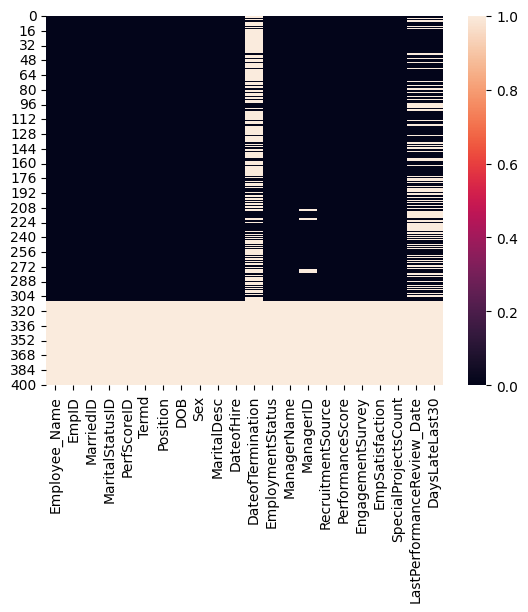

In [3]:
sns.heatmap(df.isnull())

<AxesSubplot:>

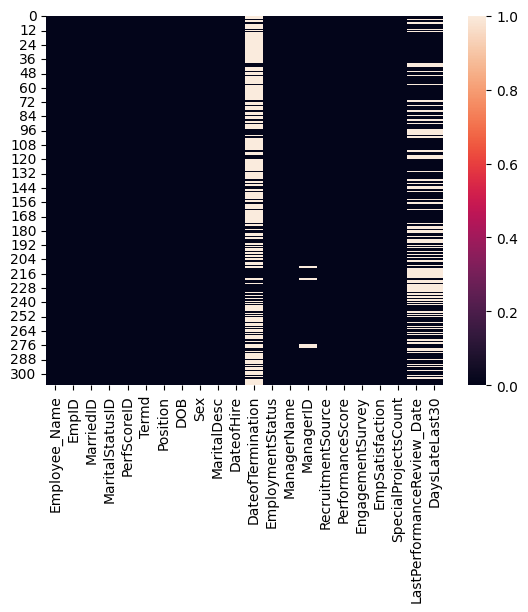

In [4]:
df=df.dropna(how='all')
sns.heatmap(df.isnull())

In [5]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [6]:
df = df.drop_duplicates()
df
print(df.shape[0])
#pokazuje liczbe wierszy
#311

310


In [7]:

df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'],format='%m/%d/%Y')
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)? 

In [8]:
df[['ManagerID','PerformanceScore']].dtypes

ManagerID           float64
PerformanceScore     object
dtype: object

In [9]:
df['ManagerID'].isna
df['PerformanceScore'].isna
df['ManagerID'].value_counts()

20.0    22
18.0    22
16.0    22
22.0    21
19.0    21
14.0    21
11.0    21
12.0    21
2.0     19
4.0     17
17.0    14
7.0     14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
30.0     1
3.0      1
Name: ManagerID, dtype: int64

In [10]:
df['ManagerID'].isna


<bound method Series.isna of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
305    7.0
306    7.0
307    7.0
308    7.0
309    7.0
Name: ManagerID, Length: 310, dtype: float64>

In [11]:
df['PerformanceScore'].isna

<bound method Series.isna of 0      Fully Meets
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
305    Fully Meets
306    Fully Meets
307    Fully Meets
308    Fully Meets
309    Fully Meets
Name: PerformanceScore, Length: 310, dtype: object>

In [12]:
df['PerformanceScore'].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   12
Name: PerformanceScore, dtype: int64

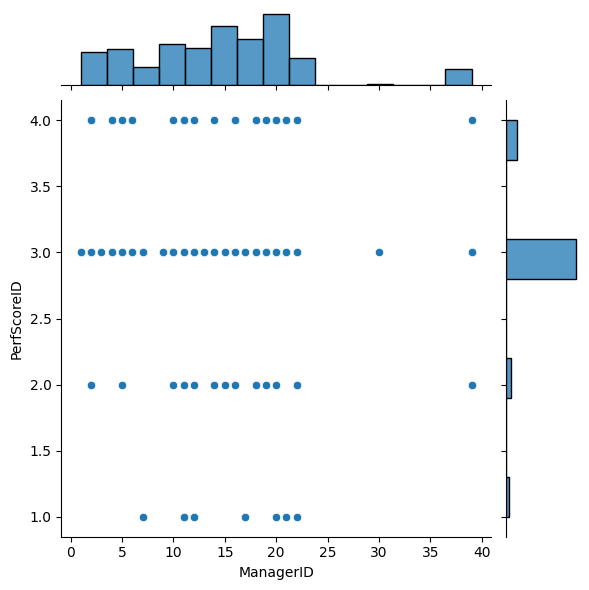

In [13]:
sns.jointplot(x='ManagerID', y='PerfScoreID', data=df)

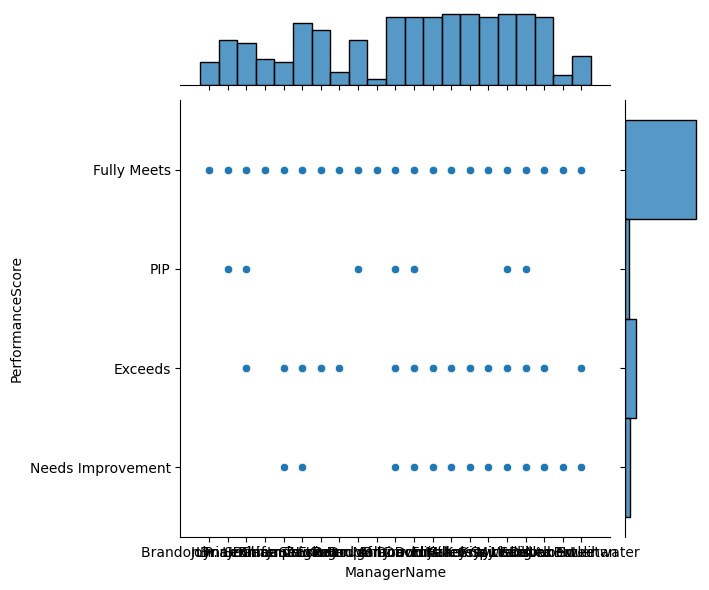

In [14]:
sns.jointplot(x='ManagerName', y='PerformanceScore', data=df)

<AxesSubplot:>

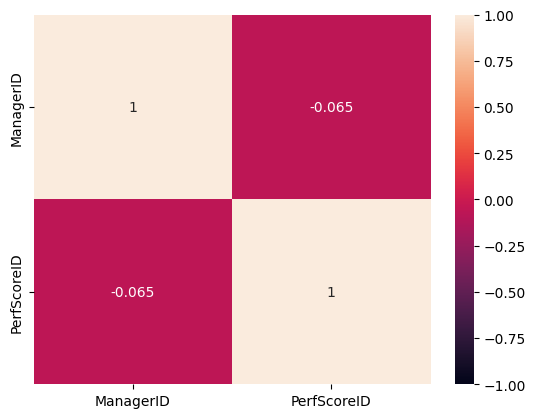

In [15]:

sns.heatmap(df[['ManagerID','PerfScoreID']].corr(), vmin=-1, vmax=1, annot=True)

In [16]:

df.corr(method ='pearson') 

,EmpID,MarriedID,MaritalStatusID,PerfScoreID,Termd,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
EmpID,1.000000,0.034146,0.112300,-0.019210,-0.035483,0.045432,-0.005720,-0.017726,-0.171329,NaN
MarriedID,0.034146,1.000000,0.163655,-0.045959,0.071844,-0.092960,0.019149,-0.126980,0.056748,NaN
MaritalStatusID,0.112300,0.163655,1.000000,0.047773,0.098774,0.023278,0.021298,0.001990,-0.051893,NaN
PerfScoreID,-0.019210,-0.045959,0.047773,1.000000,-0.099112,-0.065306,0.056095,0.310654,0.059719,NaN
Termd,-0.035483,0.071844,0.098774,-0.099112,1.000000,0.203496,-0.002051,-0.012829,-0.141731,NaN
ManagerID,0.045432,-0.092960,0.023278,-0.065306,0.203496,1.000000,0.018402,0.109771,-0.524194,NaN
EngagementSurvey,-0.005720,0.019149,0.021298,0.056095,-0.002051,0.018402,1.000000,-0.017123,-0.040253,NaN
EmpSatisfaction,-0.017726,-0.126980,0.001990,0.310654,-0.012829,0.109771,-0.017123,1.000000,0.036456,NaN
SpecialProjectsCount,-0.171329,0.056748,-0.051893,0.059719,-0.141731,-0.524194,-0.040253,0.036456,1.000000,NaN
DaysLateLast30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

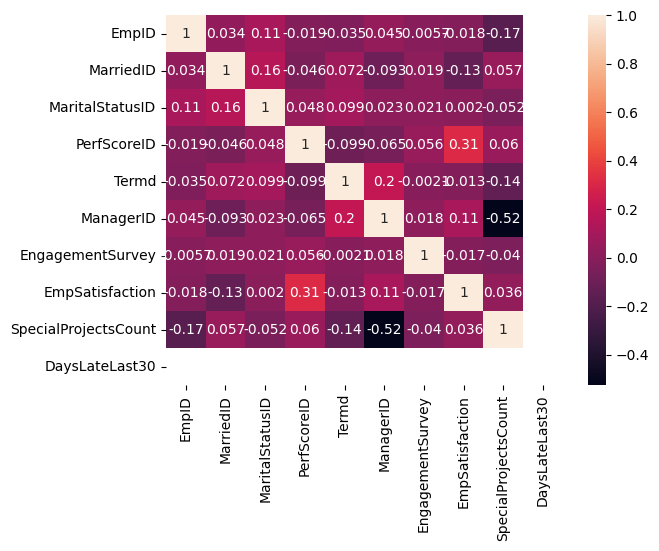

In [17]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

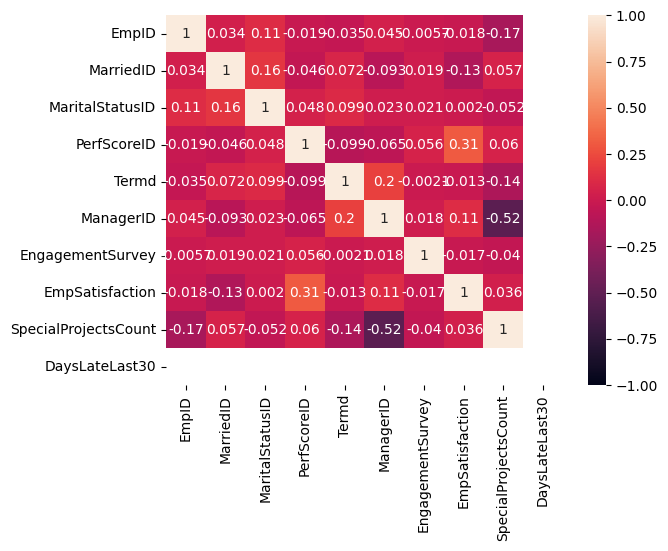

In [18]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [19]:
df2=df[['ManagerName','PerformanceScore', 'MarriedID']].groupby(['ManagerName','PerformanceScore']).count().reset_index()
df2.rename(columns={'MarriedID':'count'}, inplace=True)
df2.sample(20)
# mamy korelacje miedzy ManagerID a PerfScoreId na poziomie 0,065 jest niska, na podstawie niebieskiego wykresu widac tez ze 
#przewaznie oceny sa pozytywne Fully Meets ma wiekszosc, a Exceeds jest na drugim miesjcu pod wzg czestosci wystepowania

,ManagerName,PerformanceScore,count
24,Janet King,Exceeds,4
27,Jennifer Zamora,Exceeds,2
5,Amy Dunn,Needs Improvement,1
22,Eric Dougall,Exceeds,1
45,Michael Albert,Exceeds,2
41,Kissy Sullivan,PIP,1
23,Eric Dougall,Fully Meets,3
29,Jennifer Zamora,Needs Improvement,1
28,Jennifer Zamora,Fully Meets,4
39,Kissy Sullivan,Fully Meets,18


Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [20]:

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (int)((end_date - row['DateofHire'])/np.timedelta64(1,'Y'))

print(df['DateofTermination'].agg(['min', 'max']))

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

min   2010-07-30
max   2016-06-16
Name: DateofTermination, dtype: datetime64[ns]


,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10
1,2014-01-06,NaT,5
2,2014-09-29,NaT,4
3,2015-02-16,2015-04-15,0
4,2015-05-01,NaT,4


In [21]:
#sns.jointplot(x='RecruitmentSource',y='Seniority',data=df,kind='hex')
#Dlaczego to nie działą

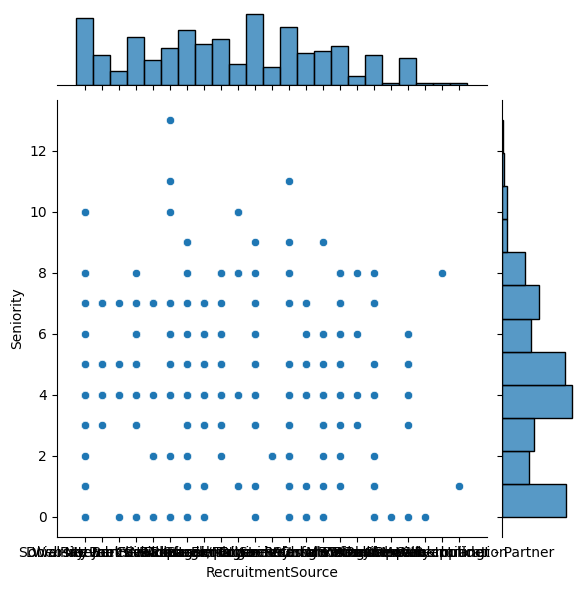

In [22]:
sns.jointplot(x='RecruitmentSource',y='Seniority',data=df)

In [23]:
dff = df[df['Seniority']>5]
df3=dff[['RecruitmentSource','Seniority','MarriedID']].groupby(['RecruitmentSource']).count().reset_index()
df3=df3.sort_values(by=['Seniority'], ascending=False)
df3
'''Billboard	8	8
7	MBTA ads	8	8
2	Diversity Job Fair	8	8
14	Search Engine - Google Bing Yahoo	7	7
12	Pay Per Click - Google	7	7
8	Monster.com	7	7
13	Professional Society	6	6
9	Newspager/Magazine	6	6
3	Employee Referral	6	6
11	Other	'''

'Billboard\t8\t8\n7\tMBTA ads\t8\t8\n2\tDiversity Job Fair\t8\t8\n14\tSearch Engine - Google Bing Yahoo\t7\t7\n12\tPay Per Click - Google\t7\t7\n8\tMonster.com\t7\t7\n13\tProfessional Society\t6\t6\n9\tNewspager/Magazine\t6\t6\n3\tEmployee Referral\t6\t6\n11\tOther\t'

In [24]:
df[['MaritalStatusID']].value_counts()

MaritalStatusID
0.0                137
1.0                123
2.0                 30
3.0                 12
4.0                  8
dtype: int64

In [25]:
df[['EmpSatisfaction']].value_counts()

EmpSatisfaction
3.0                108
5.0                 98
4.0                 93
2.0                  9
1.0                  2
dtype: int64

 Billboard, Diversity Job Fair, Monster.com, Other, Search Engine - Google Bing Yahoo

Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)? 

<AxesSubplot:>

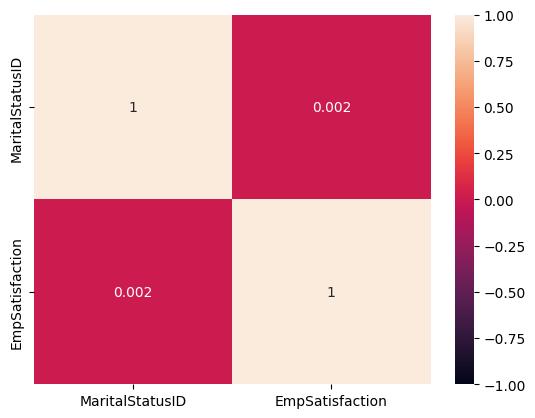

In [26]:
sns.heatmap(df[['MaritalStatusID','EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)
#jak widac korelacja pomiedzy stanem cywilnym i zadowoleniem z pracy jest bardzo niska

In [27]:
#df['MaritalID'].corr(df['EmpSatisfaction'])
df[['MaritalDesc','EmpSatisfaction']]

,MaritalDesc,EmpSatisfaction
0,Married,2.0
1,Divorced,4.0
2,Single,5.0
3,Married,3.0
4,Single,3.0
...,...,...
305,Married,5.0
306,Married,5.0
307,Married,4.0
308,Single,3.0


In [28]:
df4 = df[['MaritalDesc','EmpSatisfaction', 'Seniority']].groupby(['MaritalDesc','EmpSatisfaction']).count().reset_index()
df4.rename(columns={'Seniority':'count'}, inplace=True)
df4

,MaritalDesc,EmpSatisfaction,count
0,Divorced,2.0,1
1,Divorced,3.0,6
2,Divorced,4.0,14
3,Divorced,5.0,9
4,Married,2.0,5
5,Married,3.0,54
6,Married,4.0,31
7,Married,5.0,33
8,Separated,1.0,1
9,Separated,3.0,4


Jak wygląda struktura wieku aktualnie zatrudnionych pracowników? 

In [29]:
def how_old_are_employee(row):

    actual_date = dt.datetime(2022,11,14)
    age= (int)((actual_date - row['DOB'])/np.timedelta64(1,'Y'))
    
    if age <0:
        return 0
    else :
        return age

df['how_old_is'] = df.apply(lambda row:  how_old_are_employee(row),axis=1)
df[['DOB','how_old_is']].sample(20)

,DOB,how_old_is
239,1992-08-17,30
281,1990-04-19,32
306,1986-04-23,36
195,2051-01-02,0
151,1974-05-31,48
127,1984-07-07,38
50,1987-12-17,34
222,1975-04-03,47
168,1992-06-18,30
282,1989-11-11,33


C:\Users\aga\Desktop\Kodilla\kurs_python\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='how_old_is', ylabel='Density'>

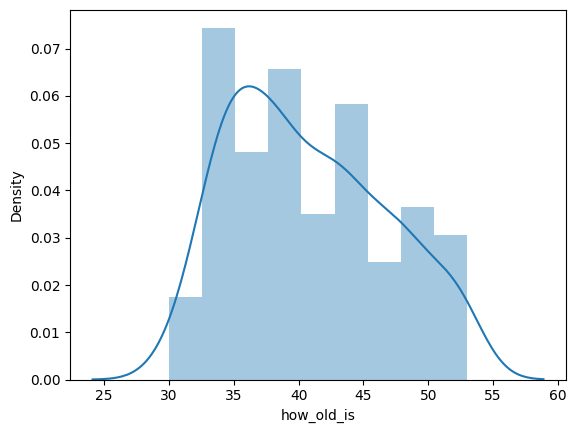

In [30]:
df = df[df['how_old_is']>0]
sns.distplot(df['how_old_is'])

In [31]:
print(df['how_old_is'].agg(['min', 'max']))

min    30
max    53
Name: how_old_is, dtype: int64


Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [32]:
old_empl = df[df['how_old_is']>45]
young_empl = df[df['how_old_is']<=45]
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'PerfScoreID',
       'Termd', 'Position', 'DOB', 'Sex', 'MaritalDesc', 'DateofHire',
       'DateofTermination', 'EmploymentStatus', 'ManagerName', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Seniority', 'how_old_is'],
      dtype='object')

In [38]:
old_empl[['SpecialProjectsCount','EmpID']].groupby(['SpecialProjectsCount']).count().reset_index()

#df4.rename(columns={'Seniority':'count'}, inplace=True)

,SpecialProjectsCount,EmpID
0,0.0,52
1,4.0,1
2,5.0,3
3,6.0,2
4,7.0,5


In [39]:
young_empl[['SpecialProjectsCount','EmpID']].groupby(['SpecialProjectsCount']).count().reset_index()

,SpecialProjectsCount,EmpID
0,0.0,154
1,2.0,1
2,3.0,2
3,4.0,7
4,5.0,16
5,6.0,18
6,7.0,6
7,8.0,1


mlodzi pracownicy czesciej uczestnicza w specjalnych projektach